# Eploratory Data Analysis into the lending process of Borrowme

### imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### loading dataset

In [3]:
df = pd.read_csv('Borrowme EDA.csv')

In [4]:
df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


### Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [6]:
df.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

The output above shows no null values in the dataset 

In [7]:
df.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


##### From this descriptive statistics we can conclude that:
* The youngest customer is 18 years, oldest is 96, while we have an average of 43 years
* The average income between customers is approximately 3,654 
* Among the customesr the 3.5 as the average years of employment is 3 with a maximum and minimum value of 16 and 0 respectively
* The highest number of inquires made by a single customers is 30. This shows that customers lodged a lot of complaints

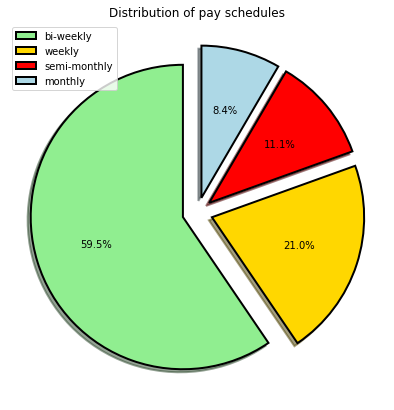

In [8]:
fig = plt.figure(figsize = (7,7))
colors = ('lightgreen', 'gold', 'red', 'lightblue')
labels = ('Positive', 'Neutral', 'Negative')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['pay_schedule'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '', labels = None, legend = True)
plt.title('Distribution of pay schedules')
plt.show()

From the distribution of customers payment schedules, 59% of customers opted for bi-weekly mode of payment which happens to be the highest percentage amongst the available payment schedules, With monthly payment schedules being the lowest with 8.4%

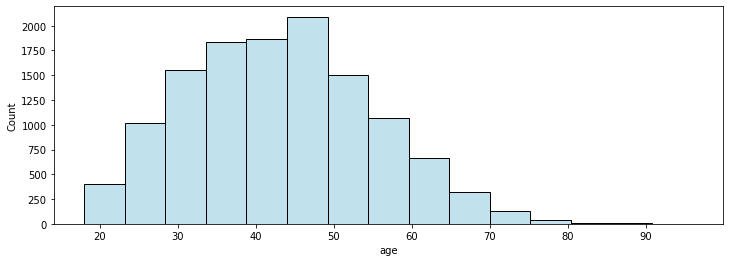

In [9]:
plt.figure(figsize = (12,4))
sns.histplot(df['age'], bins = 15, color = 'lightblue')
plt.show()

It can be denoted from the histogram chart above that Borrowme's customers are majorly between the age of 30 and 55. With fewer old aged customers.

In [10]:
data = df['pay_schedule'].value_counts()
data

bi-weekly       7447
weekly          2627
semi-monthly    1388
monthly         1054
Name: pay_schedule, dtype: int64

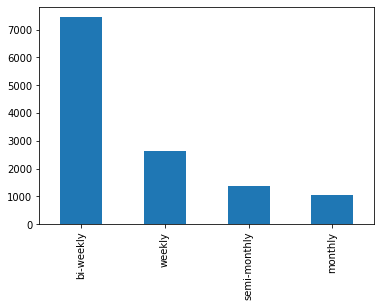

In [11]:
data.plot(kind = 'bar')
plt.show()

In [35]:
data = pd.pivot_table(df, index = 'e_signed', values = 'income', aggfunc = 'sum')
data

,income
e_signed,
0,20642795
1,25092054


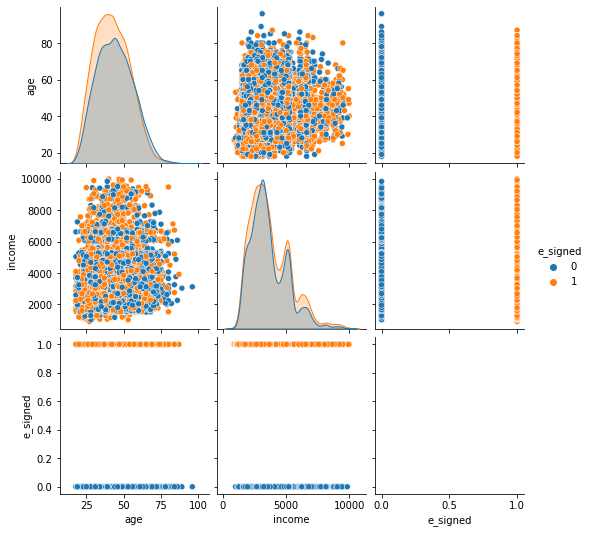

In [46]:
sns.pairplot(df, vars = ['age', 'income', 'e_signed'],
            hue = 'e_signed')
plt.show()

In [57]:
df_corr = df[['age', 'income', 'years_employed', 'has_debt', 'e_signed']].corr()
df_corr

,age,income,years_employed,has_debt,e_signed
age,1.000000,0.173751,0.181711,-0.039205,-0.084775
income,0.173751,1.000000,0.097195,-0.016620,0.039160
years_employed,0.181711,0.097195,1.000000,-0.001882,0.009607
has_debt,-0.039205,-0.016620,-0.001882,1.000000,0.032952
e_signed,-0.084775,0.039160,0.009607,0.032952,1.000000


<AxesSubplot:>

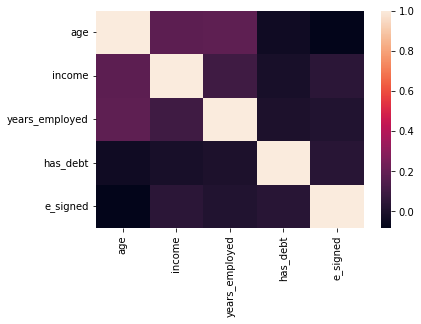

In [58]:
sns.heatmap(df_corr)

In [16]:
# total number of individuals e_signed
signed = df.e_signed.value_counts()
signed

1    6766
0    5750
Name: e_signed, dtype: int64

<AxesSubplot:>

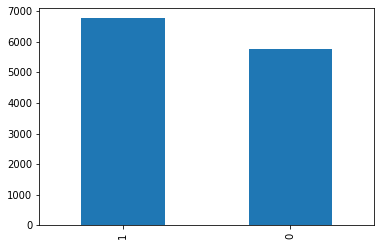

In [15]:
signed.plot(kind ='bar')

In [63]:
df.inquiries_last_month.max()

30

In [64]:
df.groupby('e_signed').agg({'years_employed':'sum'})

,years_employed
e_signed,
0,20179
1,24040


In [65]:
data = pd.pivot_table(df, index = ['e_signed', 'pay_schedule'], values = 'income', aggfunc = 'sum')
data

income
e_signed pay_schedule          
0        bi-weekly     12278214
         monthly        1796777
         semi-monthly   2207233
         weekly         4360571
1        bi-weekly     14616607
         monthly        2204713
         semi-monthly   3206716
         weekly         5064018

In [66]:
data = pd.pivot_table(df, index = 'e_signed', values = 'home_owner', aggfunc = 'sum')
data

,home_owner
e_signed,
0,2613
1,2707
